### 1. 정규분포 그려보기

In [1]:
# 라이브러리 불러오기
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
# 평균 10, 표준편차 1인 정규 분포 생성 및 시각화

mu = 10
std = 1
norm_ = norm(mu, std)

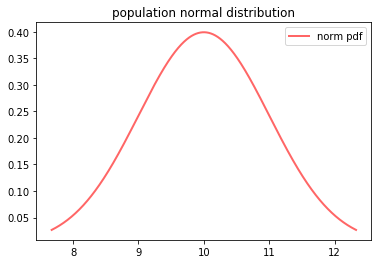

In [12]:
# 1%일 때 x값, 99%일 때 x값 사이의 x값 생성
x = np.linspace(norm_.ppf(0.01), norm_.ppf(0.99), 1000) # ppf : 함수의 function
plt.plot(x, norm_.pdf(x), 'r-', lw=2, alpha=0.6, label = 'norm pdf')
plt.title('population normal distribution')
plt.legend()
plt.show()

### 2. 표본생성 및 구간추정

In [13]:
# n개 표본으로 구성된 실험/조사의 평균
n = 100
data_norm = norm_.rvs(n)

In [14]:
data_norm

array([ 9.07586656, 10.6542887 , 10.2572389 ,  8.07851697,  8.43491851,
       10.0967238 ,  9.54696068, 10.11958125, 11.28119056, 10.51062174,
        9.48344459,  8.62816589, 10.28543371, 10.18868969,  9.68967896,
       10.0904384 , 11.80817973,  9.07665081,  9.78317299, 10.33080239,
        9.65702223,  9.90850643, 12.28822597, 10.99445571,  9.15270945,
       11.40098715,  9.97755634, 10.14630072,  9.6937739 , 11.00034389,
       10.41809598, 10.1954593 ,  9.72981863,  9.09744845,  9.4053872 ,
        9.42584177,  9.33607901, 10.24982493,  7.75449404,  9.93878249,
       12.4925978 ,  9.8114386 , 10.1441633 , 10.15818776,  8.86606158,
        9.60868528,  8.15842491,  9.91213062, 11.08966571,  8.83409206,
       10.45349221,  9.01577416, 10.17328854,  9.45825029,  9.61344769,
       11.28001116,  7.62031743,  9.73848766, 10.543004  ,  9.8559725 ,
       11.41918788, 10.76650649,  9.87634528, 11.55306282, 10.41467006,
       10.23950765,  8.67492809,  9.05540428, 11.19734029,  8.38

In [15]:
# 표본의 통계량(estimator) 추정
mu_sample = np.mean(data_norm)
std_sample = np.std(data_norm, ddof=1)

In [16]:
print('표본의 평균 :', mu_sample)
print('표본의 표준편차 :', std_sample)

표본의 평균 : 9.933587276613965
표본의 표준편차 : 1.0156331314446025


In [17]:
# 상한, 하한 추정 (95% 구간 z=1.96)
L_ = mu_sample - 1.96 * (std_sample/np.sqrt(n))
U_ = mu_sample + 1.96 * (std_sample/np.sqrt(n))

In [18]:
# 시각화를 위한 Sample 정보를 이용한 정규분포 생성
new_norm = norm(mu_sample, std_sample)

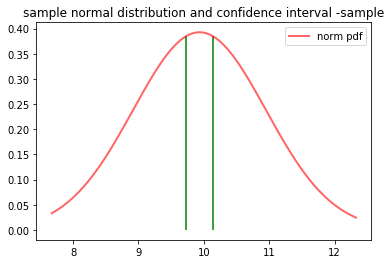

In [20]:
# 시각화
plt.vlines(L_, 0, new_norm.pdf(L_), colors = 'g')
plt.vlines(U_, 0, new_norm.pdf(U_), colors = 'g')
plt.plot(x, new_norm.pdf(x), 'r-', lw=2, alpha=0.6, label = 'norm pdf')
plt.title('sample normal distribution and confidence interval -sample')
plt.legend()
plt.show()

In [19]:
print('하한 :', L_)
print('평균 :', mu_sample)
print('상한 :', U_)

하한 : 9.734523182850822
평균 : 9.933587276613965
상한 : 10.132651370377108
